### Student Information
Name: Kanokphan Thananchai (柯諾潘)

Student ID: 112065431

GitHub ID: hedgehog-menn

Kaggle name: Hedgehog 🦔

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

<img src="img/pic0.png" style="width: 100%;"/>

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

In [1]:
### Begin Assignment Here

# Table of contents
- [Take Home Exercise](#takehome)
    - [Exercise 1](#exercise1)
    - [Exercise 2](#exercise2)
    - [Exercise 3](#exercise3)
    - [Exercise 4](#exercise4)
    - [Exercise 5](#exercise5)
    - [Exercise 6](#exercise6)
    - [Exercise 7](#exercise7)
    - [Exercise 8](#exercise8)
- [Kaggle Competition](#kaggle-competition)
    - [Strategy](#Strategy)
    - [Preparing and save the labeled data and testing data](#prep)
    - [Preprocessing](#pros)
    - [Performing Embedding (tweet vectorization)](#tweet_vec)
    - [Training the model and evaluate the performance](#train)
        - [TFIDF vectorizer](#TFIDF)
        - [Doc2vec](#Doc2vec)
        - [Bag of Words](#BOW)
        - [Word2vec+TFIDF weighted](#Word2vec+TFIDF)
        - [BERT](#BERT)
    - [Training with larger dataset (final code)](#Final)
    - [Analysis of results](#Analysis)

# Take Home Exercise <a name="takehome"></a>

In [2]:
### Prerequisite ###
import pandas as pd

# Use os.path to support running from different OS
from os import path

# training data
anger_train = pd.read_csv(path.join('..', 'data', 'semeval','train', 'anger-ratings-0to1.train.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
sadness_train = pd.read_csv(path.join('..', 'data', 'semeval','train', 'sadness-ratings-0to1.train.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
fear_train = pd.read_csv(path.join('..', 'data', 'semeval','train', 'fear-ratings-0to1.train.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
joy_train = pd.read_csv(path.join('..', 'data', 'semeval','train', 'joy-ratings-0to1.train.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])

# testing data
anger_test = pd.read_csv(path.join('..', 'data', 'semeval', 'dev', 'anger-ratings-0to1.dev.gold.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
sadness_test = pd.read_csv(path.join('..', 'data', 'semeval', 'dev', 'sadness-ratings-0to1.dev.gold.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
fear_test = pd.read_csv(path.join('..', 'data', 'semeval', 'dev', 'fear-ratings-0to1.dev.gold.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])
joy_test = pd.read_csv(path.join('..', 'data', 'semeval', 'dev', 'joy-ratings-0to1.dev.gold.txt'),
                         sep='\t', header=None, names=['id', 'text', 'emotion', 'intensity'])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
## Exercise 1 <a name="exercise1"></a>
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [3]:
# Answer here

from sklearn.feature_extraction.text import CountVectorizer

# For `train_df`
count_vect = CountVectorizer()
train_count = count_vect.fit_transform(train_df.text)   # - Learn vocabulary and return document-term matrix - #

# For `test_dt`
count_vect_1 = CountVectorizer()
test_count = count_vect_1.fit_transform(test_df.text)   # - Learn vocabulary and return document-term matrix - #

In [4]:
# Take a look at data
train_df.text

3214    @Nataliem55 sadly, war has often been the fact...
509     @HuffPostUK  NO greater wrath than a woman sco...
2230    The T.I / Shawty Lo beef is one of the more un...
1832    After Nawaz Sharif's speech on terrorism, Kejr...
3279    @Janet_Reid Wonderful post! Novelists shouldn'...
                              ...                        
594          #welfarereform should not be a 'model' for .
2491    Check out this #film Robocoq 301 #animated #sh...
485     And she got all angry telling me 'but what wou...
3088    Some of these people at this protest are just ...
1867        ok, ok.. I know.. my last tweet was #terrible
Name: text, Length: 3613, dtype: object

In [5]:
# Check type of data
type(count_vect.get_feature_names_out())

numpy.ndarray

In [6]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
%matplotlib inline

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Text(0.5, 1.0, 'Top 30 words frequenct in training data')

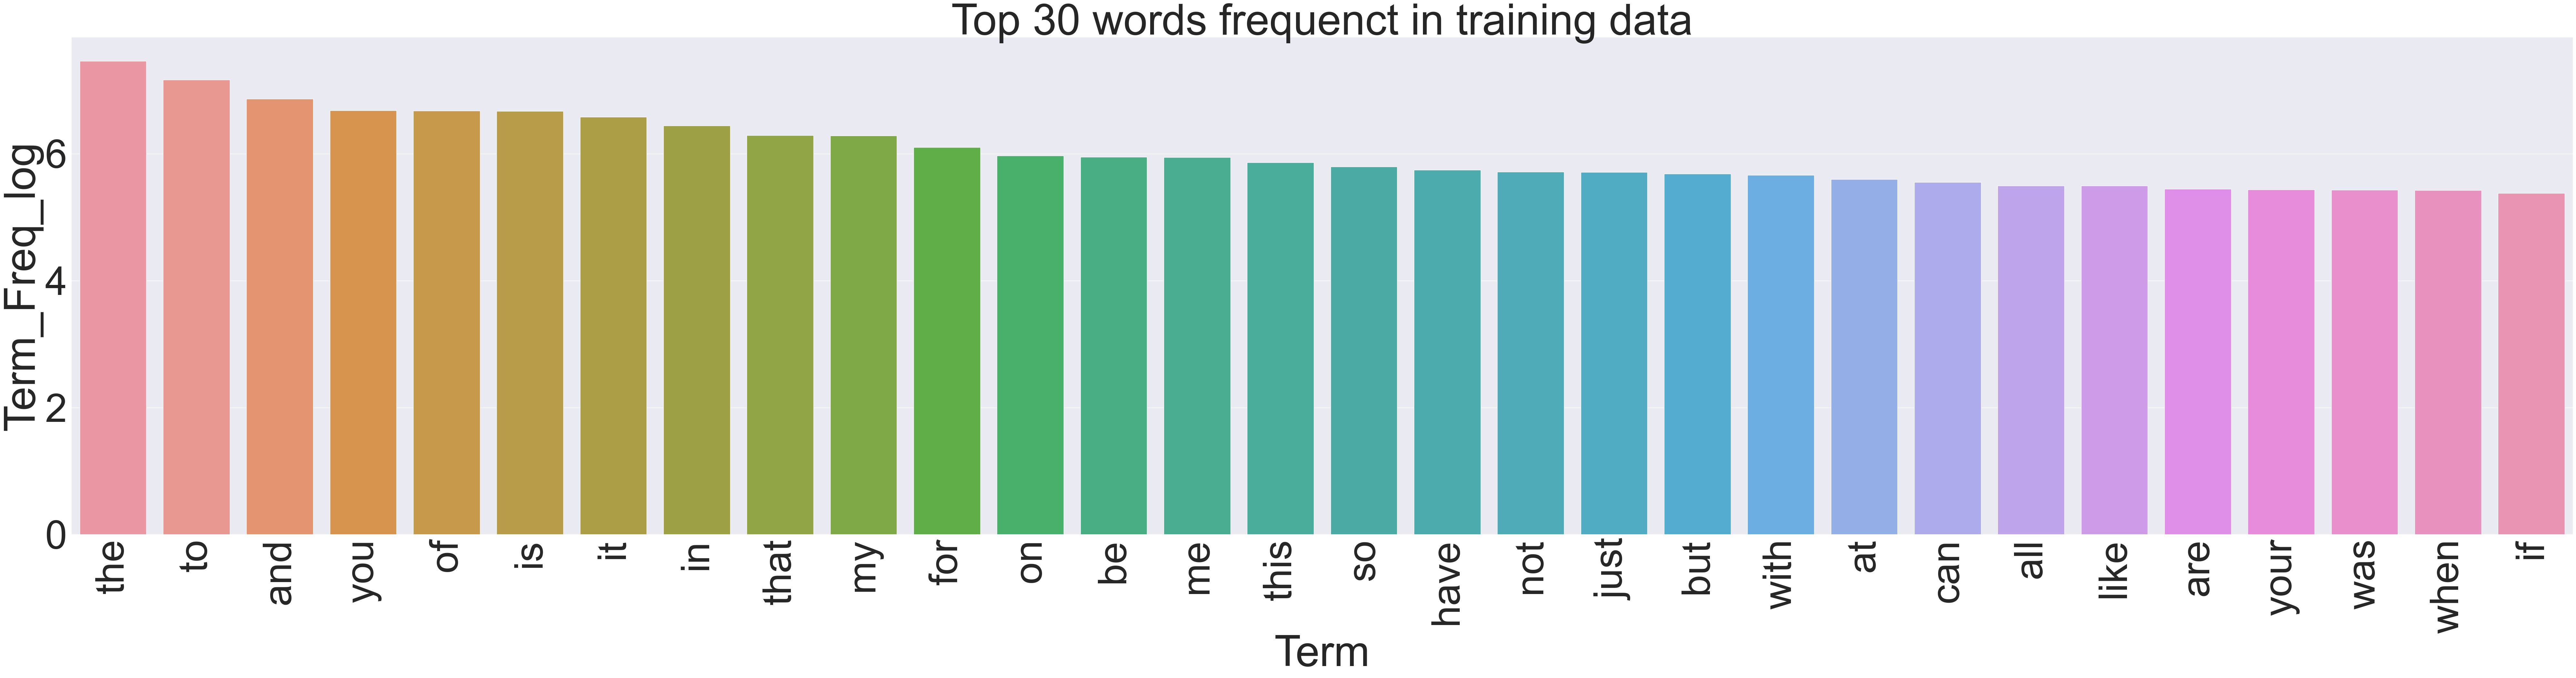

In [7]:
# Term Frequency for *** Training data ***
term_freq_train = np.asarray(train_count.sum(axis=0))[0]
term_freq_train_log = [math.log(i) for i in term_freq_train]   # for sns.barplot

# Dataframe for plot graph
df_plotly_train = pd.DataFrame(count_vect.get_feature_names_out(), columns = ['Term'])
df_plotly_train['Term_Freq'] = term_freq_train
df_plotly_train['Term_Freq_log'] = term_freq_train_log

sns.set(font_scale=8) # increse font_size from defualt: 1

# Plot graph
plt.subplots(figsize = (100, 20))
g = sns.barplot(x = df_plotly_train.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'],
               y = df_plotly_train.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term_Freq_log'])
g.set_xticklabels(df_plotly_train.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'], rotation = 90)

plt.title('Top 30 words frequenct in training data')

Text(0.5, 1.0, 'Top 30 words frequenct in testing data')

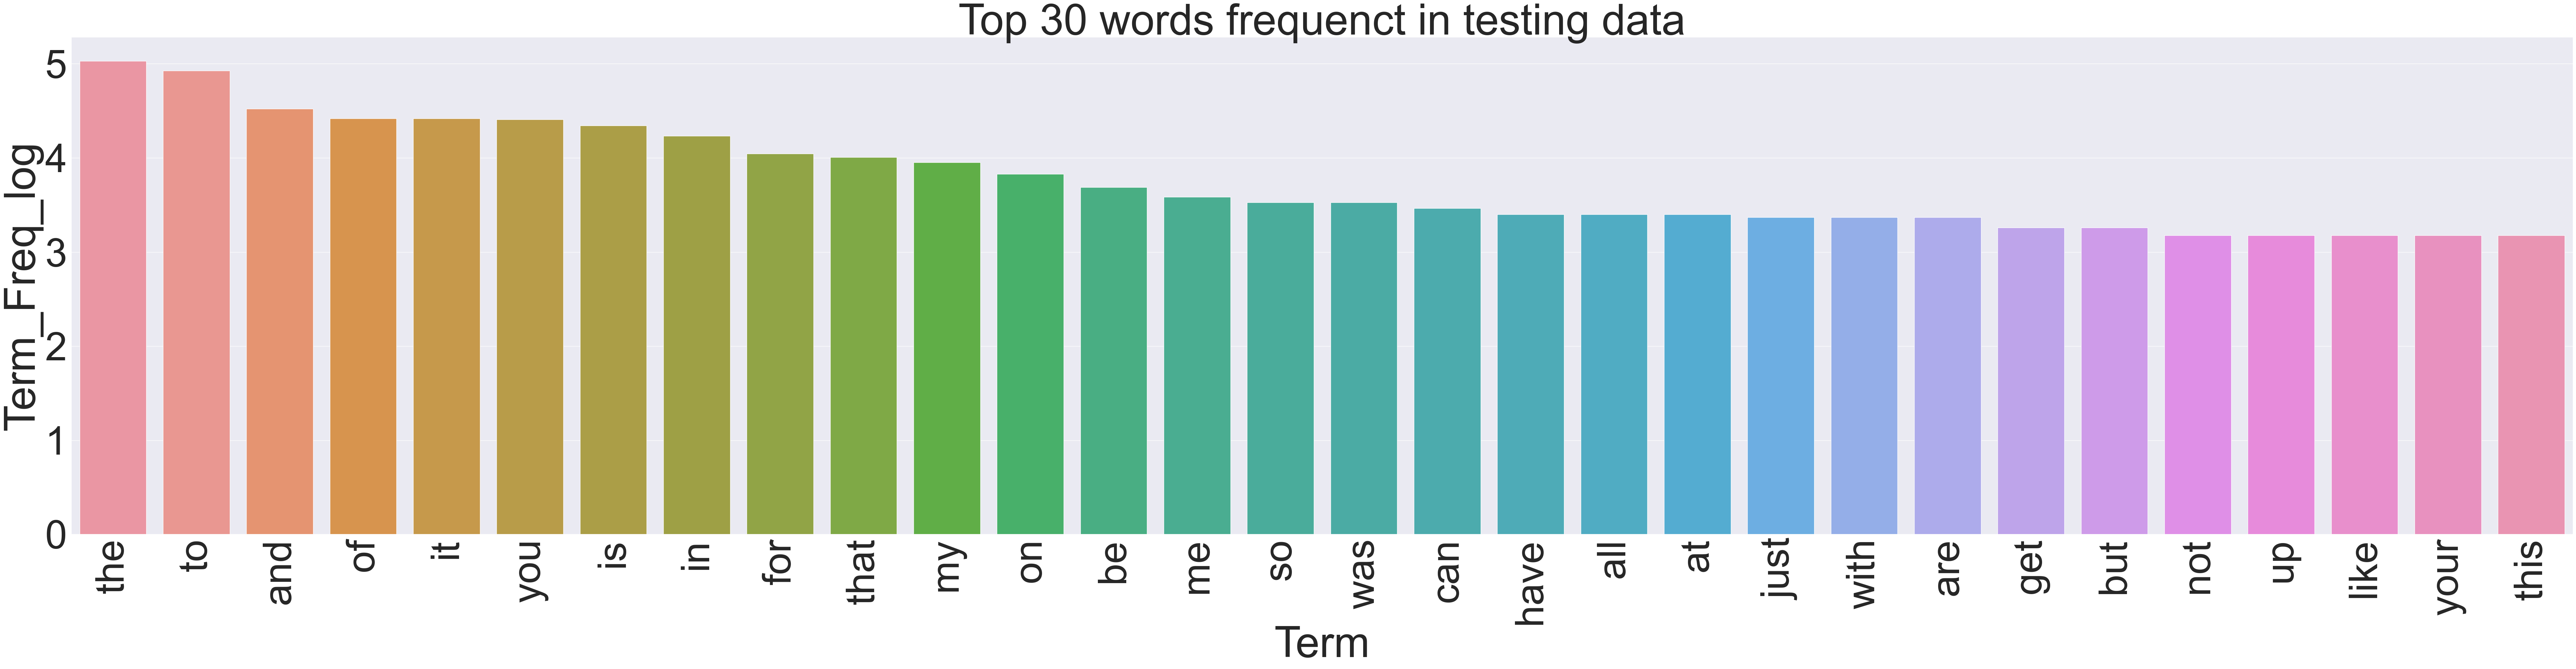

In [8]:
# Term Frequency for *** Test data ***
term_freq_test = np.asarray(test_count.sum(axis=0))[0]
term_freq_test_log = [math.log(i) for i in term_freq_test]   # for in sns.barplot

# Dataframe for plot graph
df_plotly_test = pd.DataFrame(count_vect_1.get_feature_names_out(), columns = ['Term'])
df_plotly_test['Term_Freq'] = term_freq_test
df_plotly_test['Term_Freq_log'] = term_freq_test_log

sns.set(font_scale=8) # increse font_size from defualt: 1

# Plot graph
plt.subplots(figsize = (100, 20))
g = sns.barplot(x = df_plotly_test.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'],
               y = df_plotly_test.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term_Freq_log'])
g.set_xticklabels(df_plotly_test.sort_values(by=['Term_Freq_log'], ascending=False)[0:30]['Term'], rotation = 90)

plt.title('Top 30 words frequenct in testing data')

---
## Exercise 2 <a name="exercise2"></a>
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [9]:
# Answer here

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000)

# Learn the vocabulary, and return document-term matrix 
z = vectorizer.fit_transform(train_df['text'])

In [10]:
# Take a look at data
vectorizer.get_feature_names_out()[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
## Exercise 3 <a name="exercise3"></a>
Can you interpret the results above? What do they mean?

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


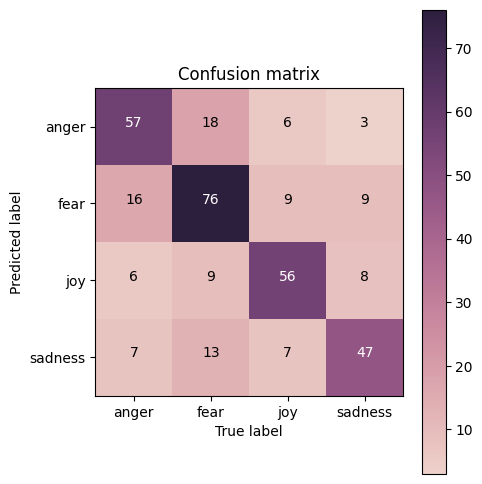

In [6]:
### Prerequisite ###
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [ ]:
# Answer here

x-axis represents the actual label and y-axis represents the predicted label, so this diagonal shows how prediction correct.

- **anger** - model predicts correctly 57 out of 86 records and mostly misinterprete with fear
- **fear** - model predicts correctly 76 out of 116 recorsd and mostly misinterprete with anger
- **joy** - model predicts correctly 56 out of 78 records and mostly misinterprete with fear
- **sadness** - model predicts correctly 47 out of 67 records and mostly misinterprete with fear

by percentage model predict **joy** emotion best
<br>
Model usually misinterpretes between fear and anger (predict anger as fear, fear as anger)

---
## Exercise 4 <a name="exercise4"></a>
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

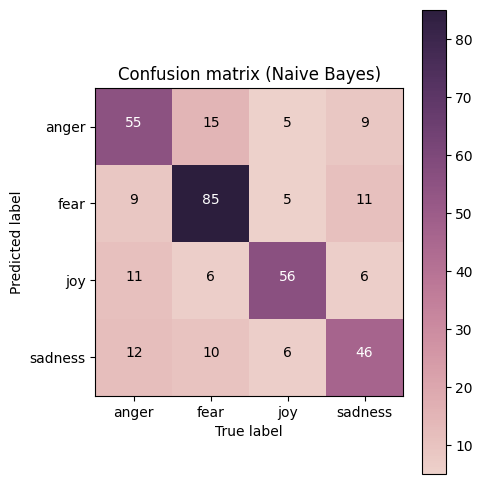

In [14]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_mnb_train_pred = mnb.predict(X_train)
y_mnb_test_pred= mnb.predict(X_test)
cm2 = confusion_matrix(y_true=y_test, y_pred=y_mnb_test_pred)
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix (Naive Bayes)')

---
## Exercise 5 <a name="exercise5"></a>
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [12]:
### Prerequisite ###
from sklearn.metrics import accuracy_score ## accuracy
from sklearn.metrics import classification_report ## precision, recall, f1-score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

In [ ]:
# Answer here

**Decision Tree**

In [13]:
print(classification_report(y_true=y_test, y_pred=y_test_pred))
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347

training accuracy: 0.99
testing accuracy: 0.68


**Naive Bayes**

In [15]:
acc_mnb_train = accuracy_score(y_true=y_train, y_pred=y_mnb_train_pred)
acc_mnb_test = accuracy_score(y_true=y_test, y_pred=y_mnb_test_pred)

print(classification_report(y_true=y_test, y_pred=y_mnb_test_pred))
print('training accuracy: {}'.format(round(acc_mnb_train, 2)))
print('testing accuracy: {}'.format(round(acc_mnb_test, 2)))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

training accuracy: 0.79
testing accuracy: 0.7


**Decision Tree** has more consistent value of matrices over the four emotions, while **Naive Bayes** has more fluctuation in the value of matrices over the four emotions.
<br><br>
The reason is that **Decision Tree** is a non-parametric model and make no assumption about the data distribution, while **Naive Bayes** make assumption that the features are independent, which is not true in this case. Therefore, the result of Naive Bayes has more fluctuation in the value of matrices over the four emotions.

---
## Exercise 6 <a name='exercise6'></a>

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

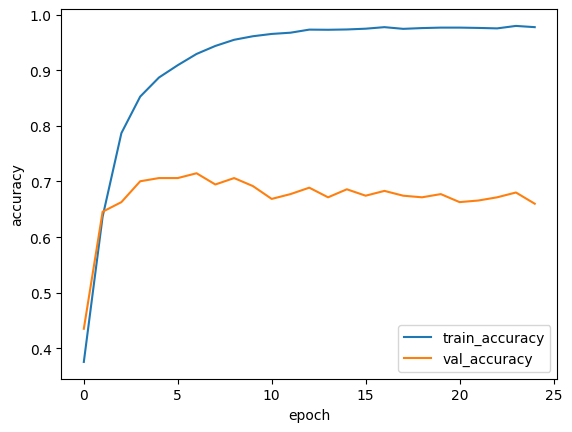

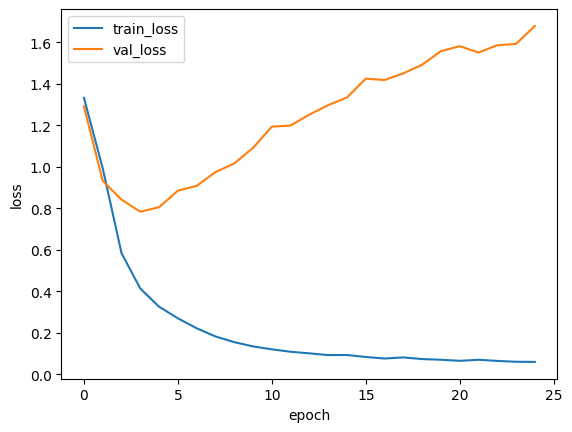

In [ ]:
training_log = pd.read_csv('drive/MyDrive/Colab Notebooks/dm2023-homework/logs/training_log.csv')

# Answer here
training_log.columns = map((lambda x: x.strip()), training_log.columns)

sns.lineplot(training_log, x='epoch', y='accuracy', label='train_accuracy')
sns.lineplot(training_log, x='epoch', y='val_accuracy', label='val_accuracy')
plt.show()

sns.lineplot(training_log, x='epoch', y='loss', label='train_loss')
sns.lineplot(training_log, x='epoch', y='val_loss', label='val_loss')
plt.show()

In these graphs, I can interpret as below,

**Training accuracy per epoch**

From the epoch 0 to 25 `train_accuracy` shows accuracy on the train data increases from every of epoch until 10 and then start to stable until 25. Meanwhile, `val_accuracy` shows accuracy from the test data increases from epoch 0 to epoch 1 and then drops from epoch 2 or 3 (I am not sure with the scale, value was estimated) then epoch 4 it increases accuracy again and after that it's about to stable until epoch 25.

**Training loss per epoch**

`train_loss` shows loss on the train data, `val_loss` shows loss from test data. We can see from epoch 0 to 1 it decreases from high value to low value (we expected this trend because it means than the loss decreases)

`train_loss` is still decreasing till epoch 25, `val_loss` is decreasing till about epoch 4 (estimated). Then starts to increase till epoch 25.

From the detail that I've mentioned above, it related with concept **overfitting** because we train a lot of time(epoch) train accuracy is so high; increases from epoch to epoch and Train loss also decreases ,related with Train accuracy but the Val loss is after epoch about 4 (estimated) it started increase and increase till epoch 25 --> It means that train data performs so well because we train it a lot but the Val data performed not well.

We can solve this overfitting by reduce training, reduce complexity.

---
## Exercise 7 <a name="exercise7"></a>

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

In [ ]:
# Answe here

We can utilize these **"word"** vector to represent the sentence data and train model by using 2 model

- Continuous Bag of Words (CBOW) model: predicts the middle words(Target word) based on surrounding context words. The context consists of few words before and after the current (middle) word. This model's order of words in the context is not important, and also it cannot capture rare words as in the skip-gram model.
<br><br>
- Contunuous Skip-gram model: predicts words within certain range (window size) before and after the current word in the same sentence. The context word is specified by the window length. The advantage of this model, it can capture rare words and capture the similarity of word semantics.


---
## Exercise 8 <a name="exercise8"></a>
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [ ]:
### Prerequisite ###
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "drive/MyDrive/Colab Notebooks/dm2023-homework/GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


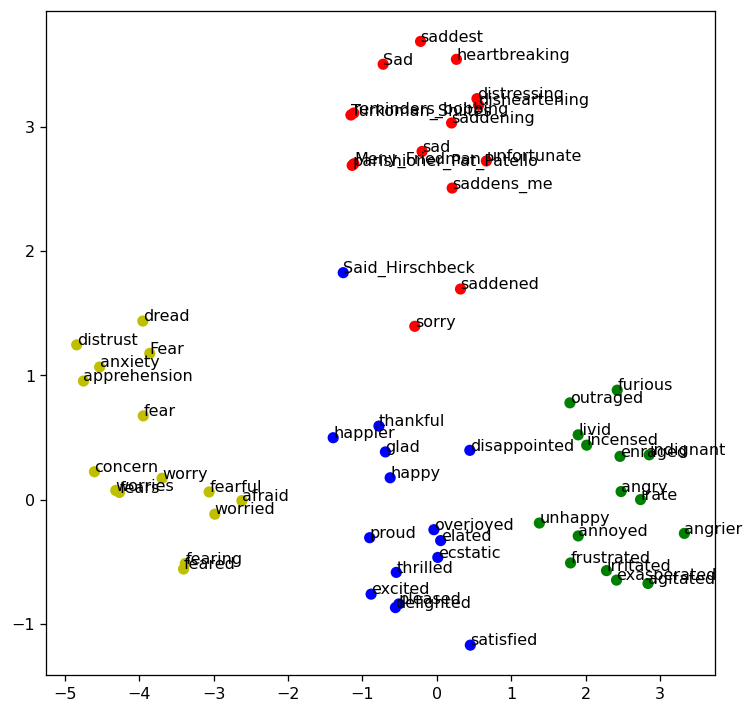

In [ ]:
# Answer here
topn2 = 14
target_words_2 = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn2)] \
              +['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn2)] \
              +['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn2)] \
              +['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn2)]

cn2 = topn2 + 1
color2 = ['b'] * cn2 + ['g'] * cn2 + ['r'] * cn2 + ['y'] * cn2

X_train2 = w2v_google_model[target_words_2]
tsne2 = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne2 = tsne2.fit_transform(X_train2)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne2[:len(target_words_2), 0], X_tsne2[:len(target_words_2), 1], c=color2)
for label, x, y in zip(target_words_2, X_tsne2[:len(target_words_2), 0], X_tsne2[:len(target_words_2), 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Kaggle Competition <a name='kaggle-competition' />

#### Strategy <a name='Strategy' />

In general, the code is devided into three parts: preprocessing of tweets, feature embedding or vectorized representation, and model training and prediction. For each of the parts, I tried several methods to achieve faster processing, data cleaning, better representation of data, less loading for memory, better performance of prediction and preventing overfitting.

- Preprosessing: 
  - In this part, my main purpose is to perform better data cleaning in a faster way. 
  - I removed unnecessary punctuation marks, however, saving the emojis which might be a sign to tell emotion. Also, I remove @... which can be useless. 
  - To make the words representative, I also eliminate word frequency less than and higher than a particular threshold. 
  - I tried simple spliting of sentance, nltk tokenizer, and gensim for tokenizing. I adopt simple splitting in the end since it is the fastest.

- Embedding:

  - TFIDF: I adopted gensim's method instead of scikit-learn since it is stored in a more compacted form.
  - Doc2vec: I use the dataset to train a word2vec model in gensim. It has the best result.
  - BOW: I simply utilize the countvectorizer to analyze word frequency.
  - Word2vec_tfidf: I compared the result from a pretrained model and self trained model. Also, I use TFIDF weighted sum of Word2vec (Word2vec_tfid) instead of simply averaging the Word2vec (Word2vec_sum). This tells the difference of importance of each words.
 

- Model training and performance evaluation: 
  - I tried on a number of classifier, including the LogisticRegression, MLP classifier, XGBClassifier, and a fully connected neural network. 
  - The result from LogisticRegression and fully connected neural network is about the same. 
  - After all, I compare their performance in the training result and valitation.
  
- Comparison with BERT language model:
  - In the last part, we compare the previous results with the performance of a BERT language model.
 

#### Preparing and save the labeled data and testing data  <a name='prep' />

In [ ]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math
import nltk
import json
import re
import gensim
from gensim import models
import string
import emoji
from emoji import UNICODE_EMOJI
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim import matutils 
from collections import defaultdict
from gensim import corpora

import multiprocessing
cores = multiprocessing.cpu_count()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import binarize
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras 
from sklearn import utils

In [34]:
data_identification = pd.read_csv("data_identification.csv")
emotion = pd.read_csv("emotion.csv")
sampleSubmission = pd.read_csv("sampleSubmission.csv")

tweets = []
for line in open('tweets_DM.json', 'r'):
    tweets.append(json.loads(line))
    
dicts={}
for i in range(len(tweets)):
    dicts[tweets[i]['_source']['tweet']['tweet_id']]=tweets[i]['_source']['tweet']['text']
    
sent_train=[]
for i in range(len(emotion.tweet_id)):
    sent_train.append(dicts[emotion.tweet_id[i]])
    
emotion['sentence']=sent_train
training=emotion

d = {'id': training.tweet_id, 'sentence': training.sentence, 'emotion': training.emotion}
train = pd.DataFrame(data=d)

test_id=sampleSubmission['id']

sent_test=[]
for i in range(len(sampleSubmission.id)):
    sent_test.append(dicts[sampleSubmission.id[i]])
    
sampleSubmission['sentence']=sent_test
test=sampleSubmission

d = {'id': test.id, 'sentence': test.sentence}
test = pd.DataFrame(data=d)

train.to_csv('train_data.csv', index=False) 
test.to_csv('test_data.csv', index=False) 

In [35]:
train = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

print('Training (labeled) data')
print(train.head())
print('\n')
print('Testing data')
print(test_data.head())

Training (labeled) data
         id                                           sentence       emotion
0  0x3140b1                             Why Chester? <LH> <LH>       sadness
1  0x368b73  @JaredLeto you are the fish that Jonah.  Excep...       disgust
2  0x296183  He is coming back again and gonna come again q...  anticipation
3  0x2bd6e1  Dei is really such a beautiful person inside &...           joy
4  0x2ee1dd  Expressive praise is also an expression of fai...  anticipation


Testing data
         id                                           sentence
0  0x2c7743  When your friends offer to bring you food 😭💘 #...
1  0x2c1eed  I've never let any money problems stop me.. I ...
2  0x2826ea  @KurtSchlichter Being a Hobby Historian Chelse...
3  0x356d9a  #Cannabis offers a natural alternative treatme...
4  0x20fd95  Last Friday off before school starts. I'm read...


#### Preprocessing  <a name='pros' />

In [36]:
# This code performs balancing between the classes of emotions. 
# However, the balancing sacrafice some data so I abandoned it after all.
# Here, we start from testing with small dataset... 

def sampling_k_elements(group, k=int(len(train.loc[train['emotion']=='anger'])/10)):
    if len(group) < k:
        return group
    return group.sample(k)

train_balanced = train.groupby('emotion').apply(sampling_k_elements).reset_index(drop=True)

# train_balanced = X_train1
train_data=train_balanced
y_train=train_data.emotion.values


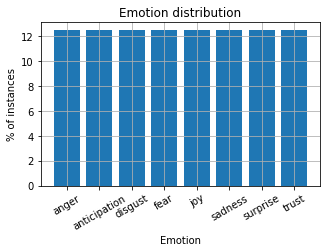

In [37]:
# Plotting histogram of the training data

train_data.groupby(['emotion']).count()['sentence']
labels = train_data['emotion'].unique()
post_total = len(train_data)
df1 = train_data.groupby(['emotion']).count()['sentence']
df1 = df1.apply(lambda x: round(x*100/post_total,3))
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.xticks(rotation=30)
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [38]:
# This part identifies the emojis in the tweets

def is_emoji(s):
    return s in UNICODE_EMOJI

def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

x=train_data['sentence'].values
y=train_data['emotion'].values


emoji_list=[]
emoji_word=[]
for i in range(len(x)):
    if len(x[i])>0:
        for j in extract_emojis(x[i]):
            if j not in emoji_list:
                emoji_list.append(j)
                emoji_word.append(y[i])

In [42]:
# Remove common words, characters, and odd words and tokenize

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt


train_data['tidy_tweet'] = np.vectorize(remove_pattern)(train_data['sentence'], "@[\w]*") 
train_data.tidy_tweet = train_data.tidy_tweet.str.replace("!", " !")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace("?", " ?")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace(".", " ")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace(",", " ")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace("'", " ")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace('"', " ")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace("/", " ")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace(":", " ")

documents = train_data['tidy_tweet']

stoplist = set("for a of the and to in & # <lh> = - . ' \ / : ,".split())
texts = [
    [word for word in document.lower().split() if (word not in stoplist and word not in list(string.ascii_lowercase))]
    for document in documents
]

# remove words that appear only once and too many times
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if (frequency[token] >1 and frequency[token] <500 and (len(token)>2 or token in emoji_list))]
    for text in texts
]


In [43]:
# Take a look of the words that appears scarcely or too often.

texts1=[]
for i in texts:
    summs=''
    for j in i:
        summs+=j
        summs+=' '
    texts1.append(summs)

thres_min=2
less=[]
for i in frequency.keys():
    if frequency[i]<thres_min:
        less.append(i)
print(less[:30])

more=[]
thres_max=500
for i in frequency.keys():
    if frequency[i]>thres_max:
        more.append(i)
print(more[:30])

['trl', '#pissed😂🤦🏽\u200d♀️', '#scofflawpoet', '#robertelee', 'symbolize', '(#mad)', 'diplomats', 'ihome', 'speedin', 'raggedy', 'muffler', 'sickly', '#bringfood', '?diesnt', '🥃📚👓', 'accessed', 'zander', '278', 'blender', '💨', '#heyheyhey', '😒😩', '#vodacom', 'preferred', '#americanexpress', '#wholeshowisacommercial', '#anticipate', 'lastborn', '?😩', '#highered']
['there', 'is', 'on', 'my', '!', 'your', 'has', 'now', 'no', 'all', 'have', 'would', 'like', 'me', 'what', 'just', 'not', 'if', 'but', 'it', '1', 'love', 'you', 'be', 'how', 'right', 'their', 'do', 'he', '?']


#### Performing Embedding (tweet vectorization) <a name='tweet_vec' />

In [44]:
# Perform TFIDF

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

tfidf = models.TfidfModel(corpus)  
corpus_tfidf = tfidf[corpus]

# Utilizing LsiModel in gensim to save the space
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=100)  
corpus_lsi = lsi_model[corpus_tfidf]  
X = [[tup[1] for tup in arr] for arr in corpus_lsi]

In [45]:
#Doc2Vec training

documents =[]
for i in range(len(texts)):
    documents.append(TaggedDocument(texts[i], [train_data.emotion[i]]))
    
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=1, hs=0, min_count=0, sample = 0, workers=cores,window=10)
model_dbow.build_vocab(documents)

for epoch in range(5):
    model_dbow.train(utils.shuffle(documents), total_examples=len(train_data.emotion), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha
    
vector = [model_dbow.infer_vector(i) for i in texts]

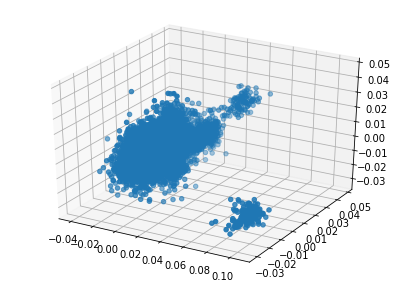

In [46]:
# We can already see from PCA some classes.

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


pca = PCA(n_components=3)
X_pca = pca.fit_transform(vector) 


fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2])

plt.show()

In [47]:
# Perform BOW analysis

text_all=np.array(texts1)
Tfidf = CountVectorizer(max_features=1000,tokenizer=nltk.word_tokenize) 
Tfidf.fit(text_all)

train_data_Tfidf_features = Tfidf.transform(text_all)
Tfidf_feature_names = Tfidf.get_feature_names()

list_count=[]
for i in train_data_Tfidf_features.toarray():
    list_count.append(i)

In [48]:
# Performing sum of Word2vec with self-trained model. I have also tried a pre-trained model but abandoned afterwards. 
# Here, it utilized TFIDF to redistribute the weights of each words.


tokenized_tweet = train_data['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=300, 
            window=10, 
            min_count=0,                             
            hs = 0,
            negative = 1, 
            workers= 32, 
            seed = 34
) 

model_w2v.train(tokenized_tweet, total_examples= len(train_data['tidy_tweet']), epochs=5)



# import gensim.downloader as api

# ## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
# import ssl
# import urllib.request
# ssl._create_default_https_context = ssl._create_unverified_context

# glove_twitter_100_model = api.load("glove-twitter-100")
# print('load ok')

# glove_twitter_100_model.most_similar('happy', topn=10)

tfidf_w2v_train=[]
eachs=[]
summs=0
    
for i in corpus_tfidf:
    vecs=np.zeros(300)
#     print(i)
    each=[]
    if len(i)>0:
        for j in i:
            if dictionary[j[0]] in model_w2v.wv:
                each.append(dictionary[j[0]])
                vecs+=model_w2v.wv[dictionary[j[0]]]*j[1] # with usinf of TFIDF
#                 vecs+=model_w2v.wv[dictionary[j[0]]] # without using pf TFIDF
        if len(each)>0:
            tfidf_w2v_train.append(vecs/len(i))
        else:
            tfidf_w2v_train.append(vecs)
    else:
        tfidf_w2v_train.append(vecs)
        
    if summs%10000==0:
        print(summs/len(texts))
    summs+=1
    eachs.append(each)
    
len_eachs=[]
for i in eachs:
    len_eachs.append(len(i))

0.0
0.3135975915704967
0.6271951831409934
0.9407927747114903


In [49]:
# Summary of the features...

train_data['text_tokenized']=texts
train_data['tfidf_w2v']=tfidf_w2v_train
train_data['tfidf']=X
train_data['len']=[len(i) for i in X]
train_data['len_w2v']=len_eachs
train_data['word_count']=list_count
train_data['doc2vec']=vector
train_data1=train_data.loc[(train_data['len']==100)&(train_data['len_w2v']!=0)]
train_data1.head()

,id,sentence,emotion,tidy_tweet,text_tokenized,tfidf_w2v,tfidf,len,len_w2v,word_count,doc2vec
0,0x340c7b,@Gap any particular reason there is a huge del...,anger,any particular reason there is a huge delay o...,"[any, particular, reason, huge, delay, order, ...","[-0.01577953611397081, -0.012507316187515648, ...","[0.055934279289019, -0.00010123090678513494, 0...",100,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0007436473, -0.001481552, -1.8246428e-05, 0..."
1,0x26d7f1,@ArgosHelpers your driver has spoiled my week....,anger,your driver has spoiled my week Went to the ...,"[driver, spoiled, week, went, wrong, address, ...","[-0.024434022286732214, -0.00882919691503048, ...","[0.005631951250029979, 0.00010017578671669772,...",100,10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.0014922924, -0.0028826543, -0.0009052783, ..."
2,0x342026,Would somebody like to explain to me what just...,anger,Would somebody like to explain to me what just...,"[somebody, explain, happened, big, brother, re...","[-0.021444012178108096, -0.008853285311488435,...","[0.0042834978555596325, 0.0002228667238712255,...",100,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.0016455457, -0.0007277205, -0.001662823, -..."
3,0x36c8d7,"I recorded TRL over the weekend, but it didn’t...",anger,I recorded TRL over the weekend but it didn’t...,"[recorded, over, weekend, didn’t, record]","[-0.016804207465611398, 0.0017052323266398162,...","[0.007053697192458715, 0.00011959499179646491,...",100,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.00084574544, 0.0019576168, -0.0023313856, ..."
4,0x2bedc4,"🕘 02:00 14 Oct <LH> 🇺🇸USD = 9,40 🇪🇺EUR = 11,10...",anger,🕘 02 00 14 Oct <LH> 🇺🇸USD = 9 40 🇪🇺EUR = 11 10...,"[🕘, oct, 🇺🇸usd, 🇪🇺eur, 🇨🇦cad, 🇬🇧gbp, 🇨🇳cny, 🇷🇺...","[0.004601035769155715, 0.0029967195878271013, ...","[0.002594349067709158, 0.9345671863069533, -0....",100,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.0024707958, 0.0012429561, -0.0034250815, 0..."


#### Training the model and evaluate the performance <a name='train' />

In [50]:
#Train, validation seperation.

from sklearn.model_selection import train_test_split
X_train1, X_val1, y_train, y_val = train_test_split(train_data1, train_data1['emotion'], test_size=0.33, random_state=42)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

##### TFIDF vectorization <a name='TFIDF' />

Training accuracy: 0.29
Testing accuracy: 0.28


              precision    recall  f1-score   support

       anger       0.32      0.28      0.30      1316
anticipation       0.31      0.39      0.34      1271
     disgust       0.18      0.42      0.25      1304
        fear       0.41      0.32      0.36      1339
         joy       0.29      0.20      0.24      1264
     sadness       0.29      0.17      0.21      1292
    surprise       0.30      0.16      0.21      1301
       trust       0.27      0.26      0.27      1264

    accuracy                           0.28     10351
   macro avg       0.30      0.28      0.27     10351
weighted avg       0.30      0.28      0.27     10351



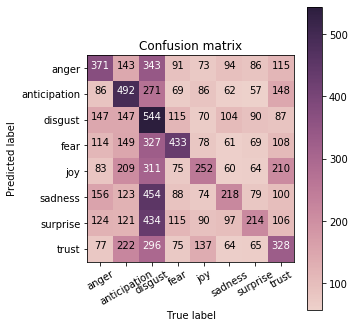

In [59]:
#  I have tried many classifiers. Here, for a comparision of performance, I utilize Logisticregression.

XX=[]
for i in X_train1['tfidf']:
    XX.append(i)

YY=[]
for i in X_val1['tfidf']:
    YY.append(i)

X_train=np.array(XX)
X_val=np.array(YY)


#MLP classifier

# from sklearn.neural_network import MLPClassifier
# DT_model =MLPClassifier(hidden_layer_sizes=(128,128), activation='relu',random_state=1, max_iter=300)


#XGBClassifier

# from xgboost.sklearn import XGBClassifier
# # DT_model = XGBClassifier(max_depth=6, n_estimators=1000)


#LogirticRegression

from sklearn.linear_model import LogisticRegression
DT_model = LogisticRegression(n_jobs=1, C=1e4)


DT_model.fit(X_train, y_train)
y_train_pred = DT_model.predict(X_train)
y_val_pred = DT_model.predict(X_val)

from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('Training accuracy: {}'.format(round(acc_train, 2)))
print('Testing accuracy: {}'.format(round(acc_val, 2)))
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_true=y_val, y_pred=y_val_pred))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred) 
my_tags = np.array(df1.index)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

##### Doc2vec <a name='Doc2vec' />

Training accuracy: 0.48
Testing accuracy: 0.47


              precision    recall  f1-score   support

       anger       0.52      0.50      0.51      1316
anticipation       0.49      0.50      0.49      1271
     disgust       0.42      0.42      0.42      1304
        fear       0.55      0.57      0.56      1339
         joy       0.43      0.44      0.44      1264
     sadness       0.40      0.41      0.41      1292
    surprise       0.50      0.45      0.48      1301
       trust       0.43      0.45      0.44      1264

    accuracy                           0.47     10351
   macro avg       0.47      0.47      0.47     10351
weighted avg       0.47      0.47      0.47     10351



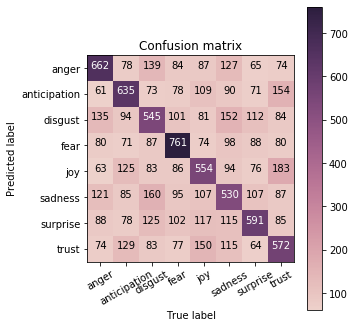

In [60]:
XX=[]
for i in X_train1['doc2vec']:
    XX.append(i)

YY=[]
for i in X_val1['doc2vec']:
    YY.append(i)

X_train=np.array(XX)
X_val=np.array(YY)

from sklearn.linear_model import LogisticRegression
DT_model = LogisticRegression(n_jobs=1, C=1e4)


DT_model.fit(X_train, y_train)
y_train_pred = DT_model.predict(X_train)
y_val_pred = DT_model.predict(X_val)

from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('Training accuracy: {}'.format(round(acc_train, 2)))
print('Testing accuracy: {}'.format(round(acc_val, 2)))
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_true=y_val, y_pred=y_val_pred))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred) 
my_tags = np.array(df1.index)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

##### BOW  <a name='BOW' />

Training accuracy: 0.44
Testing accuracy: 0.33


              precision    recall  f1-score   support

       anger       0.41      0.39      0.40      1316
anticipation       0.39      0.36      0.38      1271
     disgust       0.29      0.26      0.27      1304
        fear       0.37      0.47      0.41      1339
         joy       0.29      0.28      0.29      1264
     sadness       0.28      0.26      0.27      1292
    surprise       0.31      0.32      0.31      1301
       trust       0.30      0.32      0.31      1264

    accuracy                           0.33     10351
   macro avg       0.33      0.33      0.33     10351
weighted avg       0.33      0.33      0.33     10351



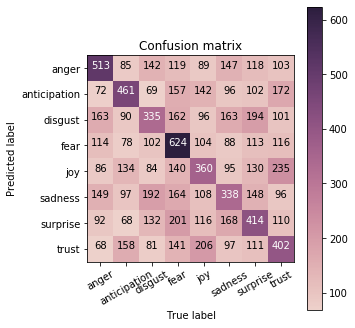

In [58]:
XX=[]
for i in X_train1['word_count']:
    XX.append(i)

YY=[]
for i in X_val1['word_count']:
    YY.append(i)

X_train=np.array(XX)
X_val=np.array(YY)

from sklearn.linear_model import LogisticRegression
DT_model = LogisticRegression(n_jobs=1, C=1e4)


DT_model.fit(X_train, y_train)
y_train_pred = DT_model.predict(X_train)
y_val_pred = DT_model.predict(X_val)

from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('Training accuracy: {}'.format(round(acc_train, 2)))
print('Testing accuracy: {}'.format(round(acc_val, 2)))
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_true=y_val, y_pred=y_val_pred))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred) 
my_tags = np.array(df1.index)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

##### Word2vec+TFIDF weighted <a name='Word2vec+TFIDF' />

Training accuracy: 0.23
Testing accuracy: 0.21


              precision    recall  f1-score   support

       anger       0.20      0.18      0.19      1316
anticipation       0.27      0.23      0.25      1271
     disgust       0.17      0.43      0.25      1304
        fear       0.27      0.18      0.22      1339
         joy       0.22      0.19      0.20      1264
     sadness       0.22      0.13      0.17      1292
    surprise       0.23      0.16      0.19      1301
       trust       0.22      0.21      0.22      1264

    accuracy                           0.21     10351
   macro avg       0.23      0.21      0.21     10351
weighted avg       0.23      0.21      0.21     10351



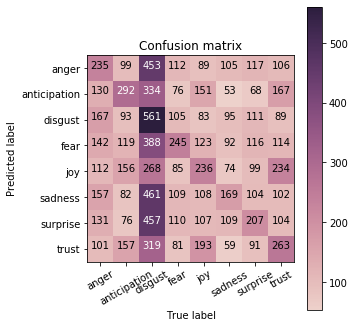

In [61]:
XX=[]
for i in X_train1['tfidf_w2v']:
    XX.append(i)

YY=[]
for i in X_val1['tfidf_w2v']:
    YY.append(i)

X_train=np.array(XX)
X_val=np.array(YY)

from sklearn.linear_model import LogisticRegression
DT_model = LogisticRegression(n_jobs=1, C=1e4)


DT_model.fit(X_train, y_train)
y_train_pred = DT_model.predict(X_train)
y_val_pred = DT_model.predict(X_val)

from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('Training accuracy: {}'.format(round(acc_train, 2)))
print('Testing accuracy: {}'.format(round(acc_val, 2)))
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_true=y_val, y_pred=y_val_pred))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_val, y_pred=y_val_pred) 
my_tags = np.array(df1.index)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

##### BERT <a name='BERT' />
- Ref: https://www.kaggle.com/aquib5559/1-6million-tweet-sentiment-analysis-using-bert
- This gives the best final result of 0.55 (from my Kaggle)

In [ ]:
# Load processed data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline
sns.set(color_codes=True)


train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

from sklearn.model_selection import train_test_split
X_train1, X_val1, y_train, y_val = train_test_split(train, train['emotion'], test_size=0.2)

train_balanced = X_train1
val_balanced = X_val1

train_data=train_balanced
val_data=val_balanced
test_data=test

y_train1=train_data.emotion.values
y_val1=val_data.emotion.values

df1 = train_data.groupby(['emotion']).count()['sentence']

index=df1.index

y_train_conv=[]

for i in y_train1:
    for j in range(8):
        if i==index[j]:
            y_train_conv.append(j)
            
y_val_conv=[]

for i in y_val1:
    for j in range(8):
        if i==index[j]:
            y_val_conv.append(j)
            
y_train=np.array(y_train_conv)
y_val=np.array(y_val_conv)

text=train_data.sentence.values
labels=y_train


# BERT tokenization and prepare training and validation data
from transformers import BertTokenizer,BertForSequenceClassification,AdamW
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

input_ids = []
attention_mask = []
for i in text:
    encoded_data = tokenizer.encode_plus(
    i,
    add_special_tokens=True,
    max_length=64,
    pad_to_max_length = True,
    return_attention_mask= True,
    return_tensors='pt')
    input_ids.append(encoded_data['input_ids'])
    attention_mask.append(encoded_data['attention_mask'])
input_ids = torch.cat(input_ids,dim=0)
attention_mask = torch.cat(attention_mask,dim=0)
labels = torch.tensor(labels)
labels = labels.to(torch.int64)

text=train_data.sentence.values
text_tests=test_data.sentence.values

input_ids_tests = []
attention_mask_tests = []
for i in text_tests:
    encoded_data = tokenizer.encode_plus(
    i,
    add_special_tokens=True,
    max_length=64,
    pad_to_max_length = True,
    return_attention_mask= True,
    return_tensors='pt')
    input_ids_tests.append(encoded_data['input_ids'])
    attention_mask_tests.append(encoded_data['attention_mask'])
input_ids_tests = torch.cat(input_ids_tests,dim=0)
attention_mask_tests = torch.cat(attention_mask_tests,dim=0)

from torch.utils.data import DataLoader,SequentialSampler,RandomSampler,TensorDataset,random_split

dataset_test = TensorDataset(input_ids_tests,attention_mask_tests)
print(len(dataset_test))
train_test = DataLoader(dataset_test, shuffle=False,batch_size = 4)

dataset = TensorDataset(input_ids,attention_mask,labels)
train_size = int(0.8*len(dataset))
val_size = len(dataset) - train_size

train_dataset,val_dataset = random_split(dataset,[train_size,val_size])

print('Training Size - ',train_size)
print('Validation Size - ',val_size)

train_dl = DataLoader(train_dataset,sampler = RandomSampler(train_dataset),
                     batch_size = 16)
val_dl = DataLoader(val_dataset,sampler = SequentialSampler(val_dataset),
                     batch_size = 16)

# Load pretrained model and start training with data

model = BertForSequenceClassification.from_pretrained(
'bert-base-uncased',
num_labels = 8,
output_attentions = False,
output_hidden_states = False)

import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

optimizer = AdamW(model.parameters(),lr = 2e-5,eps=1e-8)

from transformers import get_linear_schedule_with_warmup
epochs = 1
total_steps = len(train_dl)*epochs
scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,
                                           num_training_steps=total_steps)

def accuracy(preds,labels):
    pred_flat = np.argmax(preds,axis=1).flatten()
    label_flat = labels.flatten()
    return np.sum(pred_flat==label_flat)/len(label_flat)


def evaluate(dataloader_test):
    model.eval()
    loss_val_total = 0
    predictions,true_vals = [],[]
    for batch in dataloader_test:
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids':batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }
        with torch.no_grad():
            outputs = model(**inputs)
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    loss_val_avg = loss_val_total / len(dataloader_test)
    predictions = np.concatenate(predictions,axis=0)
    true_vals = np.concatenate(true_vals,axis=0)
    return loss_val_avg,predictions,true_vals

from tqdm.notebook import tqdm
torch.cuda.empty_cache()
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(train_dl, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(train_dl)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(val_dl)
    val_acc = accuracy(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'Accuracy: {val_acc}')

# Save model and output testing predictions
    
output_dir = './'
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

from transformers import BertTokenizer,BertForSequenceClassification
import torch
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
output_dir = './'
tokenizer = BertTokenizer.from_pretrained(output_dir)
model_loaded = BertForSequenceClassification.from_pretrained(output_dir)

def Sentiment(sent):
    output_dir = './'
    tokenizer = BertTokenizer.from_pretrained(output_dir)
    model_loaded = BertForSequenceClassification.from_pretrained(output_dir)
    encoded_dict = tokenizer.encode_plus(
                        sent, 
                        add_special_tokens = True,
                        max_length = 64,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )
        
    input_id = encoded_dict['input_ids']

    attention_mask = encoded_dict['attention_mask']
    input_id = torch.LongTensor(input_id)
    attention_mask = torch.LongTensor(attention_mask)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_loaded = model_loaded.to(device)
    input_id = input_id.to(device)
    attention_mask = attention_mask.to(device)

    with torch.no_grad():
        outputs = model_loaded(input_id, token_type_ids=None, attention_mask=attention_mask)

    logits = outputs[0]
    index = logits.argmax()
    return index

model.eval()
logit = []
summs=0
lens=len(dataset_test)/4
for batch in train_test:
    batchs = tuple(b.to(device) for b in batch)

    inputs = {'input_ids':      batchs[0],
              'attention_mask': batchs[1]
             }

    outputs = model(**inputs)
#     print(outputs)
    logit += torch.argmax(outputs[0], dim=1).cpu()
#     out.append(logit.item())
    if summs%1000==0:
        print(summs/lens)
    summs+=1
    
pred=[]
for i in logit:
    pred.append(df1.index[i])
    
test_data['emotion']=pred

sb=test_data.loc[:,['id','emotion']]
sb.to_csv('submit.csv', index=False) 

#### Training with larger dataset (final code)  <a name='Final' />

In [62]:
##### Preprocessing

train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

X_train1, X_val1, y_train, y_val = train_test_split(train, train['emotion'], test_size=0.05)

train_balanced = X_train1
val_balanced = X_val1

train_data=train_balanced
val_data=val_balanced
test_data=test

y_train=train_data.emotion.values
y_val=val_data.emotion.values

train_data['tidy_tweet'] = np.vectorize(remove_pattern)(train_data['sentence'], "@[\w]*") 
train_data.tidy_tweet = train_data.tidy_tweet.str.replace("!", " !")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace("?", " ?")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace(".", " ")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace(",", " ")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace("'", " ")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace('"', " ")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace("/", " ")
train_data.tidy_tweet = train_data.tidy_tweet.str.replace(":", " ")

val_data['tidy_tweet'] = np.vectorize(remove_pattern)(val_data['sentence'], "@[\w]*") 
val_data.tidy_tweet = val_data.tidy_tweet.str.replace("!", " !")
val_data.tidy_tweet = val_data.tidy_tweet.str.replace("?", " ?")
val_data.tidy_tweet = val_data.tidy_tweet.str.replace(".", " ")
val_data.tidy_tweet = val_data.tidy_tweet.str.replace(",", " ")
val_data.tidy_tweet = val_data.tidy_tweet.str.replace("'", " ")
val_data.tidy_tweet = val_data.tidy_tweet.str.replace('"', " ")
val_data.tidy_tweet = val_data.tidy_tweet.str.replace("/", " ")
val_data.tidy_tweet = val_data.tidy_tweet.str.replace(":", " ")

test_data['tidy_tweet'] = np.vectorize(remove_pattern)(test_data['sentence'], "@[\w]*") 
test_data.tidy_tweet = test_data.tidy_tweet.str.replace("!", " !")
test_data.tidy_tweet = test_data.tidy_tweet.str.replace("?", " ?")
test_data.tidy_tweet = test_data.tidy_tweet.str.replace(".", " ")
test_data.tidy_tweet = test_data.tidy_tweet.str.replace(",", " ")
test_data.tidy_tweet = test_data.tidy_tweet.str.replace("'", " ")
test_data.tidy_tweet = test_data.tidy_tweet.str.replace("/", " ")
test_data.tidy_tweet = test_data.tidy_tweet.str.replace('"', " ")
test_data.tidy_tweet = test_data.tidy_tweet.str.replace(":", " ")

documents = train_data['tidy_tweet']

stoplist = set("for a of the and to in & # <lh> = - . ' \ / : ,".split())

texts_train = []
lens=len(documents)
summs=0
for document in documents:
    
    tex=[]
    for word in document.lower().split():
        if (word not in stoplist and (len(word)>2 or is_emoji(word) or word in ['!','?'])):
            tex.append(word)
    texts_train.append(tex)
    
    summs+=1
    if summs%10000==0:
        print(summs/lens)

        
documents = val_data['tidy_tweet']

stoplist = set("for a of the and to in & # <lh> = - . ' \ / : ,".split())

texts_val = []
for document in documents:
    
    tex=[]
    for word in document.lower().split():
        if (word not in stoplist and (len(word)>2 or is_emoji(word) or word in ['!','?'])):
            tex.append(word)
    texts_val.append(tex)
    
documents = test_data['tidy_tweet']

stoplist = set("for a of the and to in & # <lh> = - . ' \ / : ,".split())

texts_test = []
for document in documents:
    
    tex=[]
    for word in document.lower().split():
        if (word not in stoplist and (len(word)>2 or is_emoji(word) or word in ['!','?'])):
            tex.append(word)
    texts_test.append(tex)

0.007231787466444506
0.014463574932889012
0.021695362399333517
0.028927149865778025
0.03615893733222253
0.043390724798667034
0.050622512265111545
0.05785429973155605
0.06508608719800056
0.07231787466444506
0.07954966213088957
0.08678144959733407
0.09401323706377858
0.10124502453022309
0.10847681199666759
0.1157085994631121
0.12294038692955661
0.13017217439600112
0.1374039618624456
0.14463574932889012
0.15186753679533463
0.15909932426177914
0.16633111172822365
0.17356289919466814
0.18079468666111265
0.18802647412755716
0.19525826159400167
0.20249004906044618
0.20972183652689066
0.21695362399333518
0.2241854114597797
0.2314171989262242
0.2386489863926687
0.24588077385911322
0.2531125613255577
0.26034434879200224
0.26757613625844673
0.2748079237248912
0.28203971119133575
0.28927149865778023
0.2965032861242248
0.30373507359066926
0.31096686105711374
0.3181986485235583
0.32543043599000276
0.3326622234564473
0.3398940109228918
0.34712579838933627
0.3543575858557808
0.3615893733222253
0.36882

In [63]:
##### Embedding 

documents_train =[]
for i in range(len(texts_train)):
    documents_train.append(TaggedDocument(texts_train[i], [y_train[i]]))
    
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=1,\
                     hs=1, min_count=2, sample = 0, workers=cores, window=10, max_vocab_size=None)
model_dbow.build_vocab(documents_train)

for epoch in range(10):
    print(epoch)
    model_dbow.train(utils.shuffle(documents_train), total_examples=len(train_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha
    
vector_train = []
lens=len(texts_train)
summs=0
for i in texts_train:
    vector_train.append(model_dbow.infer_vector(i))
    summs+=1
    if summs%10000==0:
        print(summs/lens)
        
vector_val = [model_dbow.infer_vector(i) for i in texts_val]


vector_test = []
lens=len(texts_test)
summs=0
for i in texts_test:
    vector_test.append(model_dbow.infer_vector(i))
    summs+=1
    if summs%10000==0:
        print(summs/lens)

0
1
2
3
4
5
6
7
8
9
0.007231787466444506
0.014463574932889012
0.021695362399333517
0.028927149865778025
0.03615893733222253
0.043390724798667034
0.050622512265111545
0.05785429973155605
0.06508608719800056
0.07231787466444506
0.07954966213088957
0.08678144959733407
0.09401323706377858
0.10124502453022309
0.10847681199666759
0.1157085994631121
0.12294038692955661
0.13017217439600112
0.1374039618624456
0.14463574932889012
0.15186753679533463
0.15909932426177914
0.16633111172822365
0.17356289919466814
0.18079468666111265
0.18802647412755716
0.19525826159400167
0.20249004906044618
0.20972183652689066
0.21695362399333518
0.2241854114597797
0.2314171989262242
0.2386489863926687
0.24588077385911322
0.2531125613255577
0.26034434879200224
0.26757613625844673
0.2748079237248912
0.28203971119133575
0.28927149865778023
0.2965032861242248
0.30373507359066926
0.31096686105711374
0.3181986485235583
0.32543043599000276
0.3326622234564473
0.3398940109228918
0.34712579838933627
0.3543575858557808
0.3615

X_train.shape:  (1382784, 300)
y_train.shape:  (1382784,)
X_test.shape:  (72779, 300)
y_test.shape:  (72779,)
check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:]:
 ['trust' 'sadness' 'joy' ... 'trust' 'anger' 'joy']

y_train.shape:  (1382784,)
y_val.shape:  (72779,)


## After convert
y_train[0:]:
 ['trust' 'sadness' 'joy' ... 'trust' 'anger' 'joy']

y_train.shape:  (1382784,)
y__val.shape:  (72779,)
input_shape:  300
output_shape:  8
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               38528     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 128)               0         
___________

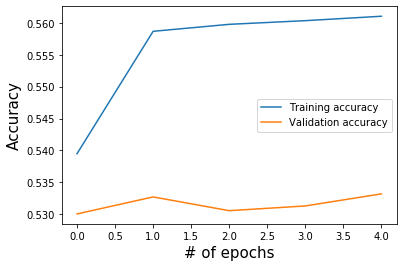

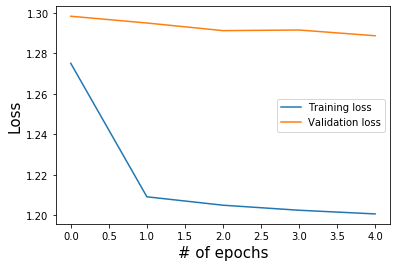

In [64]:
##### Training model 

X_train=np.array(vector_train)
X_val=np.array(vector_val)
X_test=np.array(vector_test)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_val.shape)
print('y_test.shape: ', y_val.shape)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:]:\n', y_train[0:])
print('\ny_train.shape: ', y_train.shape)
print('y_val.shape: ', y_val.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train1 = label_encode(label_encoder, y_train)
y_val1 = label_encode(label_encoder, y_val)

print('\n\n## After convert')
print('y_train[0:]:\n', y_train[0:])
print('\ny_train.shape: ', y_train.shape)
print('y__val.shape: ', y_val.shape)

input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=128)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])
opt = keras.optimizers.Adam(learning_rate=0.001)

# loss function & optimizer
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 5
batch_size = 1024

# training!
history = model.fit(X_train, y_train1, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_val, y_val1))
print('training finish')

training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

plt.plot(training_log['accuracy'],label='Training accuracy')
plt.plot(training_log['val_accuracy'],label='Validation accuracy')
plt.xlabel('# of epochs',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.legend(fontsize=10)
plt.show()

plt.plot(training_log['loss'],label='Training loss')
plt.plot(training_log['val_loss'],label='Validation loss')
plt.xlabel('# of epochs',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.legend(fontsize=10)
plt.show()

Val accuracy: 0.53


              precision    recall  f1-score   support

       anger       0.53      0.23      0.32      1977
anticipation       0.61      0.52      0.56     12289
     disgust       0.46      0.37      0.41      6962
        fear       0.59      0.36      0.45      3193
         joy       0.53      0.79      0.63     25788
     sadness       0.46      0.46      0.46      9727
    surprise       0.54      0.23      0.33      2447
       trust       0.57      0.28      0.37     10396

    accuracy                           0.53     72779
   macro avg       0.54      0.41      0.44     72779
weighted avg       0.54      0.53      0.51     72779



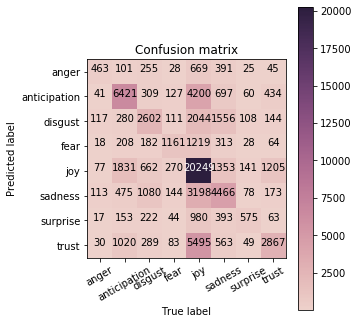

         id  emotion
0  0x2c7743      joy
1  0x2c1eed      joy
2  0x2826ea  sadness
3  0x356d9a      joy
4  0x20fd95      joy


In [66]:
##### Make prediction

def one_hot(num,tot):
    arr=[]
    for i in range(num):
        arr.append(0)
    arr.append(1)
    for i in range(tot-1-num):
        arr.append(0)
    return arr

predict_val=model.predict(X_val)
predict_test=model.predict(X_test)

preds_val=[]
probs_val=[]
for i in predict_val:
    ma=0
    val=0
    for j in range(8):
        if i[j]>val:
            ma=j
            val=i[j]
    probs_val.append(val)
    if val<0:
        preds_val.append(one_hot(4,8))
    else:
        preds_val.append(one_hot(ma,8))
    
preds_test=[]
for i in predict_test:
    ma=0
    val=0
    for j in range(8):
        if i[j]>val:
            ma=j
            val=i[j]
    if val<0:
        preds_test.append(one_hot(4,8))
    else:
        preds_test.append(one_hot(ma,8))
    
y_val_pre = label_decode(label_encoder, preds_val)
y_test_pre = label_decode(label_encoder, preds_test)

from sklearn.metrics import accuracy_score

acc_val = accuracy_score(y_true=y_val, y_pred=y_val_pre)
print('Val accuracy: {}'.format(round(acc_val, 2)))
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_true=y_val, y_pred=y_val_pre))


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_val, y_pred=y_val_pre) 
my_tags = np.array(df1.index)
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

test_data1=test_data
test_data1['emotion']=y_test_pre
sub=test_data1.loc[:,['id','emotion']]
print(sub.head())
sub.to_csv('submit.csv', index=False) 

#### Analysis of results  <a name='Analysis' />

- TFIDF (score:0.28): The TFIDF is only ideal if we use large enough database to learn the weights of each word. We do have the large amount of data, but if we use all of them, the output vector is too sparse and the data size is too large. In this case, we will be forced to limit the vocabulary which limit the performance. In another case, we need to train the LsiModel in gensim to generate TFIDF vectors. The training is a little bit tricky and the vector size again limit its performance.
- Doc2vec (score:0.47): The model can learn well to generate vectors representing sentences. Note that the parameter tuning is very sensitive as well as the training iteration. We can somehow see the classes with PCA analysis.
- BOW (score:0.33): The performance is not bad but not as good as Doc2vec.
- Word2vec (score:0.21): Basically, the self trained model has a better performance since it is based on the data set while the pretrained model may not fit to the dataset for emotion differentiation. TFIDF weighted Word2ve result is not as ideal due to the poor effect of TFIDF while direct sum of Word2vec fails to give useful information.
- BERT (score:0.55): The performance of BERT is much better compare to the results of models above, since the BERT model is pretrained with very large data. However, the traing is time and resource consuming.